In [95]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import sqlite3
import requests
import json
import ast
import re

In [96]:
conn = sqlite3.connect('data.db', check_same_thread=False)
cursor = conn.cursor()

trades = []
data = requests.get("http://20.106.210.106:3000/lastUpdated").json()

cursor.execute("SELECT * FROM currentTradeData")
current = cursor.fetchall()

cursor.execute("SELECT * FROM trades where timefram='5m'")
trades = cursor.fetchall()

trades = trades[6:]



In [97]:

print(current)



[]


Text(0, 0.5, 'Amount ($)')

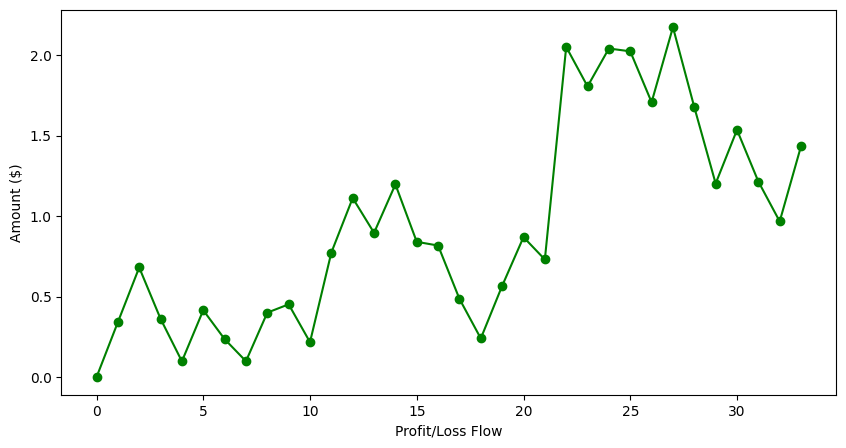

In [98]:
flow = [0]
pnl = [0] 

five = [0]
fif = [0]

for i in trades:
    flow.append(i[5]+flow[-1] - 0.05)
    pnl.append(i[5] - 0.05)

    five.append(i[5] + five[-1] - 0.07) if i[13] == "5m" else fif.append(i[5] + fif[-1] - 0.07)

plt.figure(figsize=(10, 5))
plt.plot(flow, marker='o', color='g')
plt.xlabel("Profit/Loss Flow")
plt.ylabel("Amount ($)")

Text(0, 0.5, 'Amount ($)')

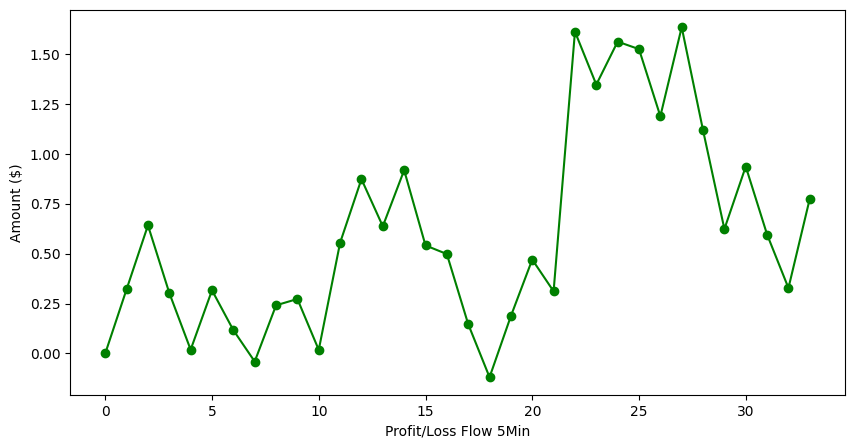

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(five, marker='o', color='g')
plt.xlabel("Profit/Loss Flow 5Min")
plt.ylabel("Amount ($)")

Text(0, 0.5, 'Amount ($)')

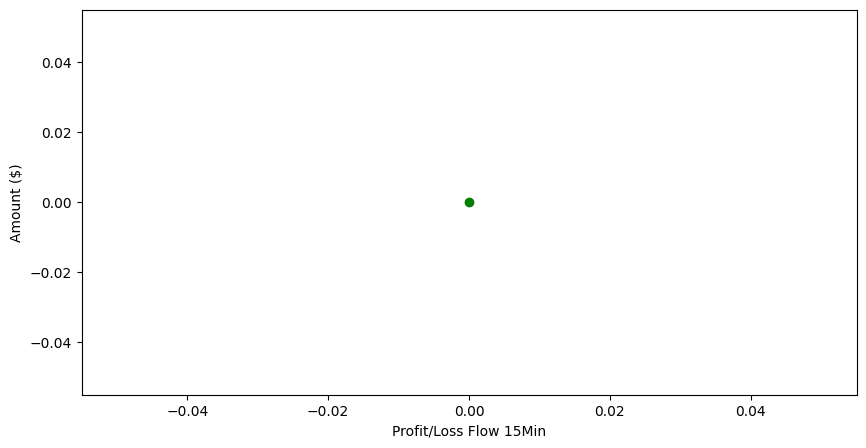

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(fif, marker='o', color='g')
plt.xlabel("Profit/Loss Flow 15Min")
plt.ylabel("Amount ($)")

<BarContainer object of 34 artists>

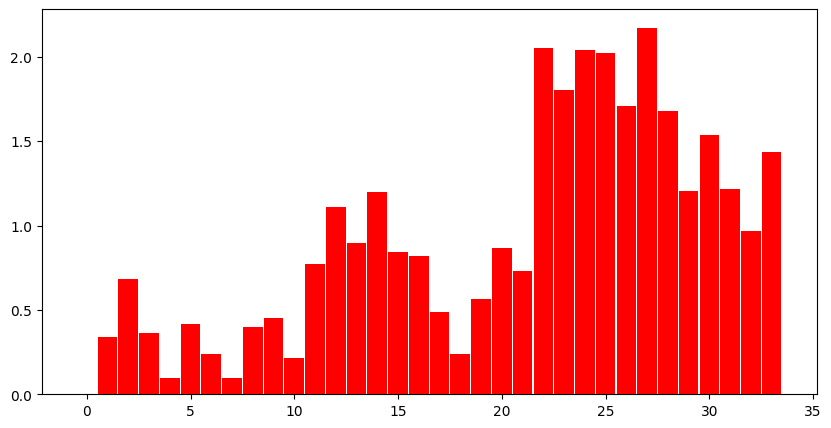

In [101]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(flow))],flow, color='red', width=0.95)

# Capital Growth 5min

<BarContainer object of 34 artists>

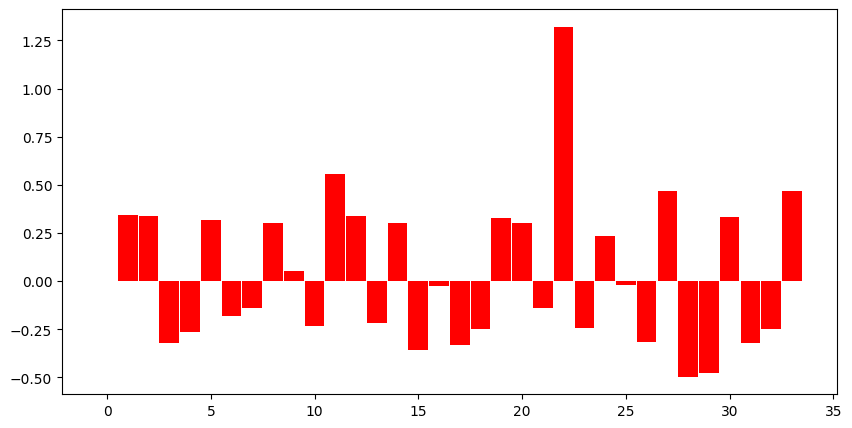

In [102]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(len(pnl))],pnl, color='red', width=0.95)

# PNL of completed trades

In [13]:
print(current)

[]
